In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import cv2

%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
'''for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))'''

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"for dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))"

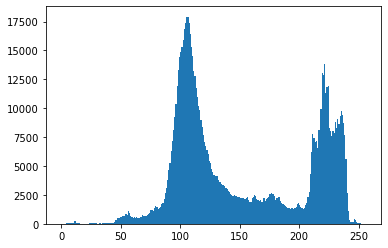

In [2]:
image = cv2.imread("/kaggle/input/foggy-road-images/Fog/762781629.png")
# plt.imshow(image)

plt.hist(image.ravel(),256,[0,256])
plt.show()

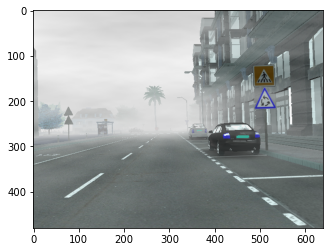

In [3]:
plt.imshow(image)
plt.show()

In [4]:
hist,bins = np.histogram(image.flatten(),256,[0,256])

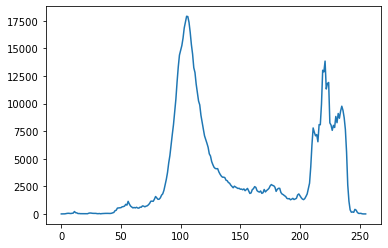

In [5]:
plt.plot(hist)
plt.show()

In [6]:
print(hist.cumsum())

[     0      0      0      7     35     85    142    185    222    275
    350    568    680    773    806    842    865    886    901    922
    936    959    978   1041   1124   1200   1257   1307   1361   1409
   1434   1457   1492   1504   1534   1571   1609   1657   1701   1750
   1797   1839   1896   1990   2122   2411   2742   3270   3811   4367
   4935   5580   6244   6953   7821   8616   9755  10657  11372  12002
  12546  13130  13675  14279  14816  15339  15953  16559  17287  17991
  18635  19336  20071  20897  21851  23004  24159  25303  26633  28211
  29658  30979  32314  33774  35472  37294  39436  42061  45198  48956
  53579  58879  65173  72374  80472  89718 100116 112067 125387 139783
 154609 169867 185797 202650 220046 237961 255845 273210 289668 305005
 319494 332745 345559 357326 368309 378542 388421 397361 405700 413391
 420469 427224 433631 439673 445117 450361 455101 459560 463784 467902
 471995 476099 479911 483516 486957 490288 493617 496910 499966 502978
 50582

In [7]:
in_arr = np.array([3, 4, 5, 2, 8])
print(in_arr.cumsum())

[ 3  7 12 14 22]


In [8]:
gfg = np.ma.masked_equal([1, 2, 3, 4,3], 2)

print(gfg)
print(np.ma.filled(gfg, 0))

[1 -- 3 4 3]
[1 0 3 4 3]


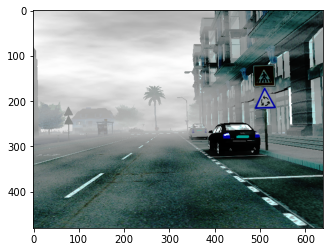

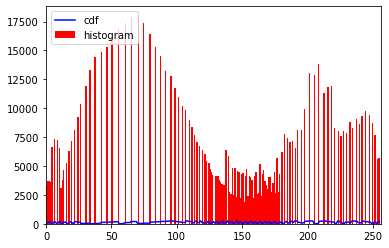

In [9]:
def eq_hist(hist):
    # We calculate the distributed function
    cdf = hist.cumsum()
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m -cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')
    
    return cdf

cdf = eq_hist(hist)
img2 = cdf[image]

hist2,bins2 = np.histogram(img2.flatten(),256,[0,256])

cdf2 = eq_hist(hist2)
img3 = cdf2[img2]
cdf_normalized = cdf2 * hist2.max()/ cdf2.max()

plt.figure()
plt.imshow(img3)

plt.figure()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img3.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [10]:
from scipy.ndimage.filters import convolve, convolve1d, gaussian_filter
import math
from skimage import io, viewer
from scipy import fftpack

/opt/conda/lib/python3.7/site-packages/skimage/viewer/utils/__init__.py:1: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  from .core import *


In [11]:
img1 = cv2.imread('/kaggle/input/computer-vision-course/imagenes/escgaus.bmp', 0)
img2 = cv2.imread('/kaggle/input/computer-vision-course/imagenes/escimp5.bmp', 0)

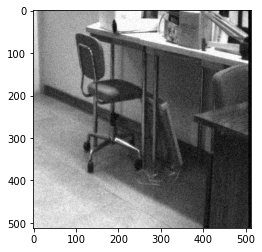

In [12]:
plt.figure()
plt.imshow(img1, cmap = plt.cm.gray)
plt.show()

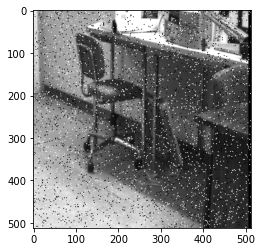

In [13]:
plt.figure()
plt.imshow(img2, cmap = plt.cm.gray)
plt.show()

In [14]:
def masc_gaus_1d(sigma, n):
    width = n//2
    dx = 1
    x = np.arange(-width, width)
    kernel_1d = np.exp(-(x**2) / (2*sigma**2))
    kernel_1d = kernel_1d / (math.sqrt(2*np.pi)*sigma)
    return kernel_1d

In [15]:
def masc_gaus_2d(sigma, n):
    width = n//2
    dx = 1
    dy = 1
    x = np.arange(-width, width)
    y = np.arange(-width, width)
    x2d, y2d = np.meshgrid(x,y)
    kernel_2d = np.exp(-(x2d ** 2+y2d**2)/ (2*sigma**2))
    kernel_2d = kernel_2d/ (2*np.pi*sigma**2)
    return kernel_2d

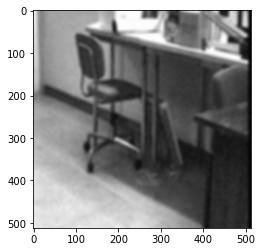

In [16]:
sigma= 5
n= 11

kernel1D = masc_gaus_1d(sigma, n)
t2_kernel1D = kernel1D[:, None]
t_kernel1D = t2_kernel1D.T
k_kernel2D = t2_kernel1D*t_kernel1D

img_convolved_1d1= convolve(img1, k_kernel2D)
plt.figure()
plt.imshow(img_convolved_1d1, cmap = plt.cm.gray)

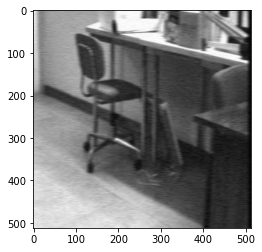

In [17]:
img_convolved_1d = convolve1d(img1, kernel1D)
plt.figure()
plt.imshow(img_convolved_1d, cmap=plt.cm.gray)
plt.show()

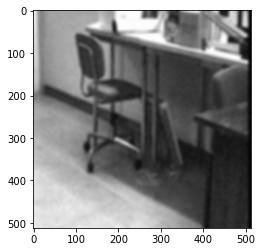

In [18]:
kernel = masc_gaus_2d(sigma, n)
img_convolved  =convolve(img1, kernel)
plt.figure()
plt.imshow(img_convolved, cmap=plt.cm.gray)
plt.show()

In [19]:
def masc_deriv_gaus_1d(sigma, n, order):
    width = n//2
    dx = 1
    x = np.arange(-width, width)
    kernel_1d = x * np.exp(-(x ** 2) / (2 * sigma ** 2))
    kernel_1d = -kernel_1d / (math.sqrt(2 * np.pi) * sigma ** 3)
    return kernel_1d

In [20]:
def masc_deriv_gaus_2d(sigma, n, orientation):
    width = n//2
    dx = 1
    dy = 1
    x = np.arange(-width, width)
    y = np.arange(-width, width)
    x2d, y2d = np.meshgrid(x, y)
    if orientation == 1:
        kernel_2d = x2d * np.exp(-(x2d ** 2 + y2d ** 2) / (2 * sigma ** 2))
    else:
        kernel_2d = y2d * np.exp(-(x2d ** 2 + y2d ** 2) / (2 * sigma ** 2))
    kernel_2d = -kernel_2d / (2 * np.pi * sigma ** 4)
    
    return kernel_2d

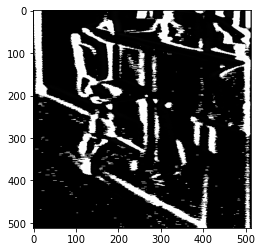

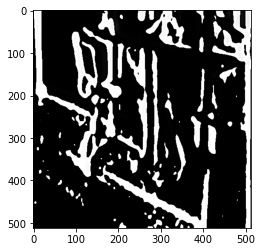

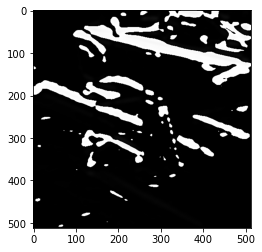

In [21]:
sigma = 7
n = 31
order = 1

# Orientation = 1 means x dervate. Orientation = 2 means y dervate.
orientation = 1

kernel1D_d = masc_deriv_gaus_1d(sigma, n, order)
img_convolved_1d = convolve1d(img1, kernel1D_d)
plt.figure()
plt.imshow(img_convolved_1d, cmap = plt.cm.gray)
# pp(kernel1D_d)

sigma = 4
n = 41

# X-derivate
kernel2D_x = masc_deriv_gaus_2d(sigma, n, orientation)
img_convolved_d2_x = convolve(img1, kernel2D_x)
plt.figure()
plt.imshow(img_convolved_d2_x, cmap = plt.cm.gray)

# Y-derivate
orientation = 2
kernel2D_y = masc_deriv_gaus_2d(sigma, n, orientation)
img_convolved_d2_y = convolve(img1, kernel2D_y)
plt.figure()
plt.imshow(img_convolved_d2_y, cmap = plt.cm.gray)